In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [54]:
class Calculation():
    def __init__(self,chien_luoc_1,chien_luoc_2,payoff1):
        self.chien_luoc_1 = np.array(chien_luoc_1)
        self.chien_luoc_2 = np.array(chien_luoc_2)
        self.payoff1 = payoff1

    def expected_value(self):
        E = np.dot(np.dot(self.chien_luoc_1.T, self.payoff1), self.chien_luoc_2)
        return E
    
    def variance(self):
        V = np.dot((np.dot(self.chien_luoc_1.T, self.payoff1)-self.expected_value())**2,self.chien_luoc_2)
        return V

In [60]:
en1=[]
A=[[0,-1,1],[1,0,-1],[-1,1,0]]
for i in range(10000):
    num = 3
    ra1 = [random.random() for i in range(num)]
    ra2 = [random.random() for i in range(num)]
    n1 = [i/sum(ra1) for i in ra1]
    n2 = [i/sum(ra2) for i in ra2]
    en1.append(Calculation(chien_luoc_1=n1,chien_luoc_2=n2,payoff1=A).expected_value())

(array([1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 8.000e+00, 6.000e+00, 1.200e+01, 2.000e+01,
        2.700e+01, 3.600e+01, 5.500e+01, 7.600e+01, 7.900e+01, 1.420e+02,
        1.730e+02, 2.420e+02, 3.140e+02, 4.410e+02, 5.690e+02, 7.970e+02,
        1.001e+03, 1.487e+03, 1.169e+03, 8.300e+02, 6.610e+02, 4.690e+02,
        3.360e+02, 2.860e+02, 2.230e+02, 1.470e+02, 1.110e+02, 6.500e+01,
        4.400e+01, 3.400e+01, 3.400e+01, 2.700e+01, 1.500e+01, 1.300e+01,
        9.000e+00, 1.100e+01, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.6659704 , -0.64003978, -0.61410916, -0.58817853, -0.56224791,
        -0.53631729, -0.51038667, -0.48445605, -0.45852543, -0.4325948 ,
        -0.40666418, -0.38073356, -0.35480294, -0.32887232, -0.3029417 ,
        -0.27701107, -0.25108045, -0.22514983, -0.19921921, -0.17328859,
        -0.14735796, -0.12142734, -0.09549672, -0.0695661 , -0.04363548,
        -0.

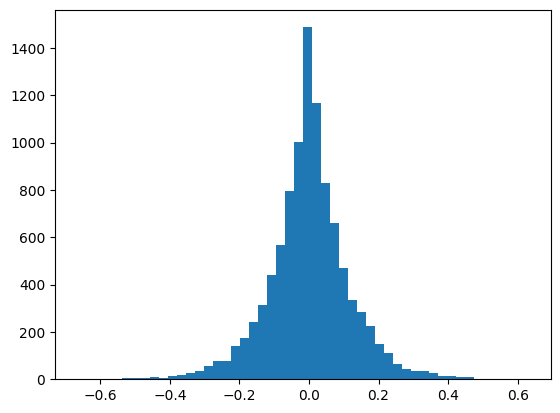

In [61]:
plt.hist(en1,bins=50)

In [80]:
class Graph():
    def __init__(self, A, p2):
        self.A = A
        self.p2 = p2
        self.n = 50000
        
        num =len(self.p2)
        ra1 = np.random.rand(self.n, num)
        ra2 = np.random.rand(self.n, num)
        self.x = ra1 / np.sum(ra1, axis=1, keepdims=True)
        self.y = ra2 / np.sum(ra2, axis=1, keepdims=True)

        self.max_index = 0
        
    def relation(self):
        e1 = []
        v1 = []       
        for i in range(self.n):
            c = Calculation(payoff1=self.A, chien_luoc_1=self.x[i], chien_luoc_2=self.y[i])
            e1.append(c.expected_value())
            v1.append(c.variance())
        plt.scatter(v1, e1)

    def curve(self):
        e1 = []
        v1 = []

        for i in range(self.n):
            c = Calculation(payoff1=self.A, chien_luoc_1=self.x[i], chien_luoc_2=self.p2)
            e1.append(c.expected_value())
            v1.append(c.variance())
        plt.scatter(v1, e1,color="pink")
        
        num = len(self.p2)
        self.o =np.eye(num)
        for i in range(num):
            p = np.array(self.o[i])
            c = Calculation(payoff1=self.A, chien_luoc_1=p, chien_luoc_2=self.p2)
            plt.scatter(c.variance(),c.expected_value(), label=f"Chiến lược {i}")
            plt.legend()

        self.max_index = np.argmax(np.array(e1)-np.array(v1))
        plt.scatter(v1[self.max_index],e1[self.max_index],color="black", label="E-V max")

    

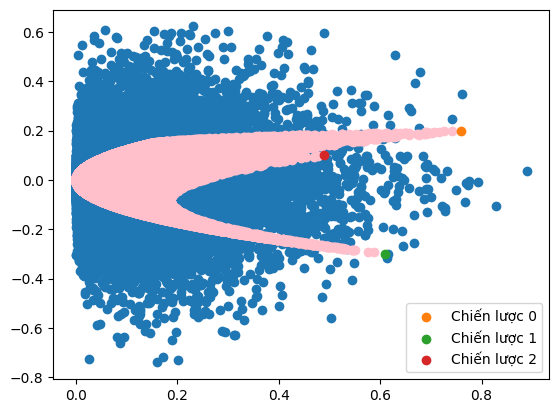

In [81]:
m=Graph(A,[0.2,0.3,0.5])
m.relation()
m.curve()

In [79]:
m.chien_luoc()

'chien luoc la [0.23147979 0.19134999 0.57717022]'